<a href="https://colab.research.google.com/github/JibrilTheUltimateFlugel/TensorflowTest/blob/main/TensorflowTutorialReinforceLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym   # all you have to do to import and use open ai gym!

In [2]:
env = gym.make('FrozenLake-v0')  # we are going to use the FrozenLake enviornment

In [3]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [4]:
env.reset()  # reset enviornment to default state

0

In [5]:
action = env.action_space.sample()  # get a random action 

In [6]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action

In [7]:
env.render()   # render the GUI for the enviornment 

  (Down)
SFFF
FHFH
FFFH
HFFG


In [8]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [9]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

In [11]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

In [13]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

NameError: ignored

In [14]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9

In [15]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[4.54209701e-01 4.80134564e-02 4.72364920e-02 4.75098291e-02]
 [6.21109134e-03 1.32314979e-02 3.29034073e-02 4.07158275e-01]
 [7.08786595e-03 2.16017094e-02 1.40969954e-02 2.63714294e-01]
 [8.05711331e-03 4.26533879e-03 7.24527404e-03 1.65514683e-01]
 [4.61078916e-01 9.13899816e-03 4.71319661e-02 5.98333040e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.22920970e-02 4.82969375e-04 3.11261834e-04 6.55947055e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.03778801e-02 2.54948649e-04 1.09284366e-02 5.93485158e-01]
 [7.26256675e-03 5.66709351e-01 2.47855654e-02 2.56358042e-02]
 [6.99016247e-01 2.74062113e-03 6.89127475e-03 9.33565383e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.24540776e-01 2.70012445e-02 6.20246333e-01 5.74086524e-02]
 [2.09851908e-01 9.27378738e-01 2.42790953e-01 1.40968293e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

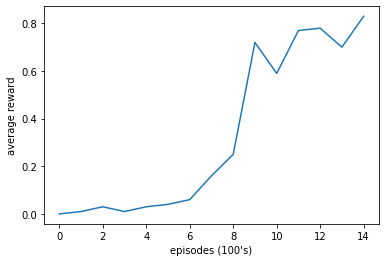

In [16]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()